In [1]:
!gdown 1jGgzp1Ydl4ofhr8fEkDsNxcL16CG-4im
!gdown 1gfmrR7lQtjGqQR1iSsuqUGcV4WA347dy

Downloading...
From: https://drive.google.com/uc?id=1jGgzp1Ydl4ofhr8fEkDsNxcL16CG-4im
To: /content/ads_data.csv
100% 81.3M/81.3M [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gfmrR7lQtjGqQR1iSsuqUGcV4WA347dy
To: /content/ads_clients_data.csv
100% 4.77M/4.77M [00:00<00:00, 40.0MB/s]


## Рекламная кампания (мини-проект)

####  Data description

**ads_data.csv:**
* date - дата
* time - время
* event – действие: просмотреть / щелкнуть
* platform – android / ios / web
* ad_id
* client_union_id
* campaign_union_id
* ad_cost_type
* ad_cost
* has_video – 0 означает "НЕТ", 1 означает "ДА"
* target_audience_count – размер целевой аудитории

**ads_clients_data.csv:**
* date
* client_union_id
* community_id
* create_date – дата регистрации рекламного клиента

**Импорт данных ads csv в рабочем каталоге**

In [3]:
import pandas as pd

data = pd.read_csv('ads_data.csv', parse_dates=['date', 'time'])

data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


**Проверка количества значений NaN в наборе данных**

In [ ]:
data.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

**Подсчитайте среднее число для каждого типа события (просмотров и кликов).**

In [4]:
# counting events
events_per_ad = data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .rename(columns={'time': 'event_count'})

events_per_ad

,ad_id,event,event_count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [6]:
# преобразование событий по типу события и заполнение NaN
pivot_events_per_ad = events_per_ad.pivot(index='ad_id', columns='event', values='event_count') \
    .fillna(0)

pivot_events_per_ad

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [7]:
# и, наконец, подсчет средних чисел для типа события
pivot_events_per_ad.mean().round(0)

,0
event,
click,113.0
view,923.0


In [10]:
# альтернативное решение
events_per_ad.groupby('event') \
    .agg({'event_count': 'sum'}) \
    .div(data.ad_id.nunique()) \
    .round(0)

# Специально не используем mean, тк он не учитывает NaN

,event_count
event,
click,113.0
view,923.0


**Давайте посмотрим на распределение просмотров**

<ipython-input-15-7c61dd23d599>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_events_per_ad.view)


<Axes: xlabel='view', ylabel='Density'>

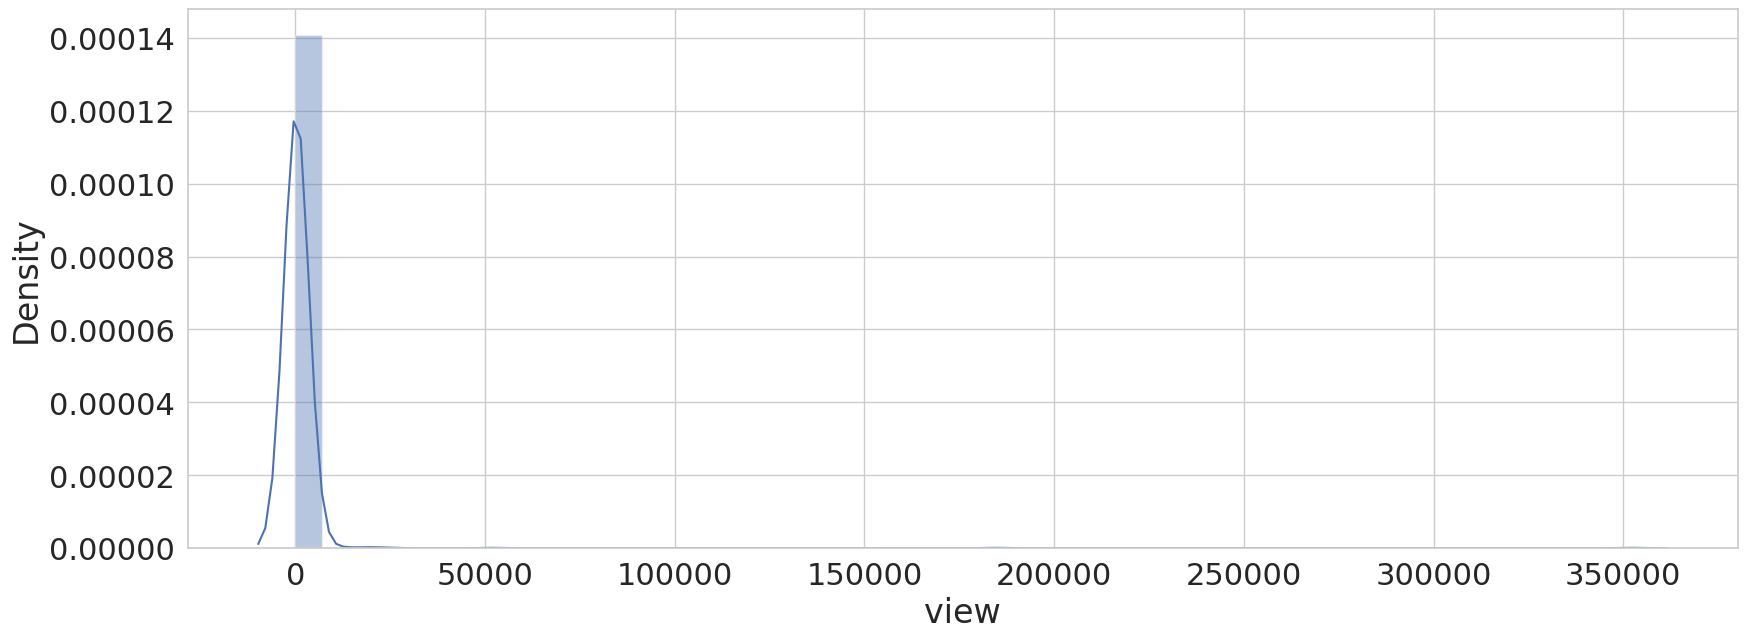

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting graphs settings
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
# plotting data
sns.distplot(pivot_events_per_ad.view)

In [ ]:
# давайте построим график данных в логарифмическом масштабе

In [16]:
# удаление нулей для np.log() на следующем этапе
pivot_events_per_ad_no_zeros = pivot_events_per_ad.query('view > 0')

<ipython-input-17-cedd15755de7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_events_per_ad.view_log)


<Axes: xlabel='view_log', ylabel='Density'>

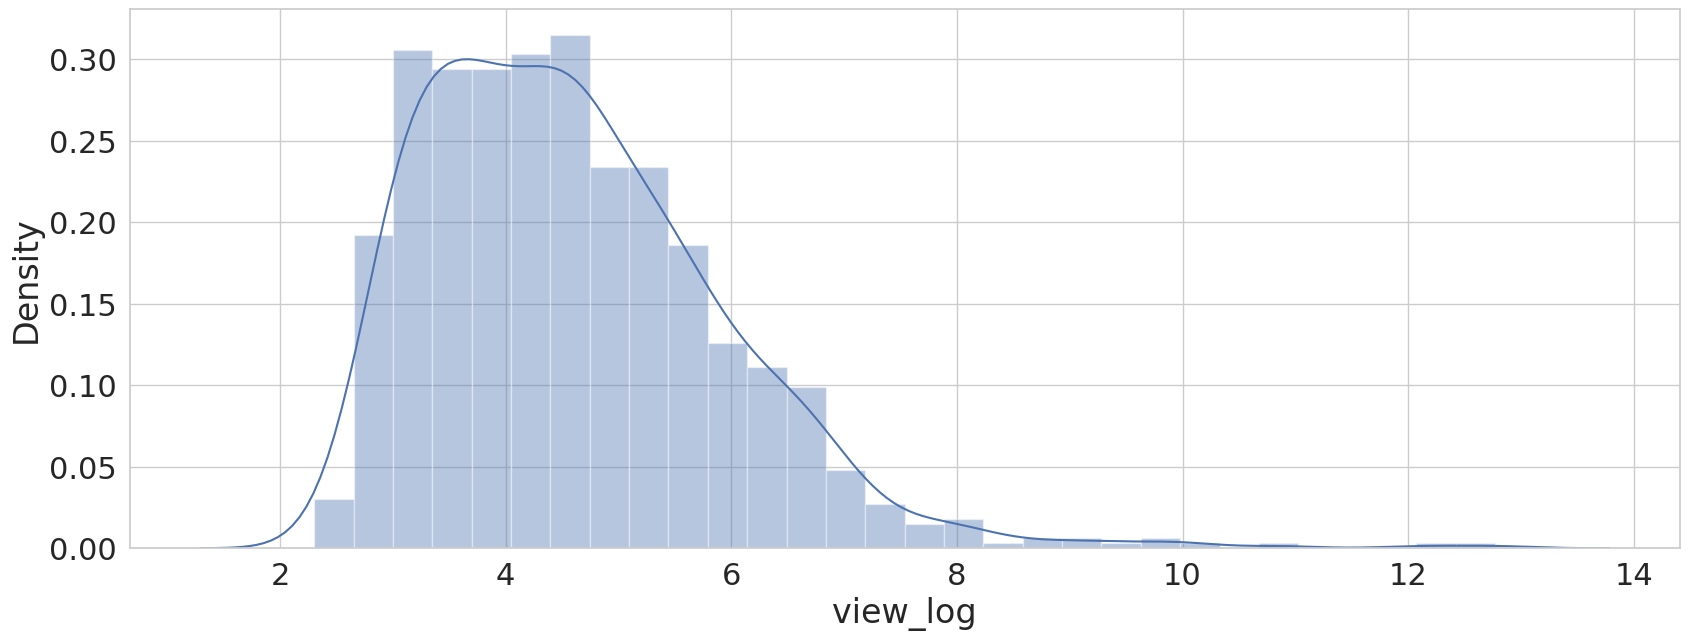

In [17]:
import numpy as np


pivot_events_per_ad['view_log'] = np.log(pivot_events_per_ad_no_zeros.view)

sns.distplot(pivot_events_per_ad.view_log)

In [ ]:
# теперь мы можем видеть, что распределение данных похоже на нормальное

**Найдите среднее количество просмотров каждого объявления в день.**

In [18]:
avg_view_per_day = data.query('event == "view"') \
    .groupby(['date', 'ad_id'], as_index=False) \
    .agg({'time': 'count'}) \


avg_view_per_day

,date,ad_id,time
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17
...,...,...,...
1926,2019-04-06,119161,14
1927,2019-04-06,119175,27
1928,2019-04-06,121309,111
1929,2019-04-06,121820,11


**Подсчитайте простое скользящее среднее с параметром периода, равным 2**

In [29]:
avg_view_per_day.groupby('date', as_index=False) \
    .agg({'time': 'mean'}).time.rolling(2).mean().round(0)

,time
0,NaN
1,146.0
2,151.0
3,420.0
4,798.0
5,598.0


**Нанесите на один и тот же график среднее количество просмотров и количество просмотров SMA**

<Axes: xlabel='date', ylabel='value'>

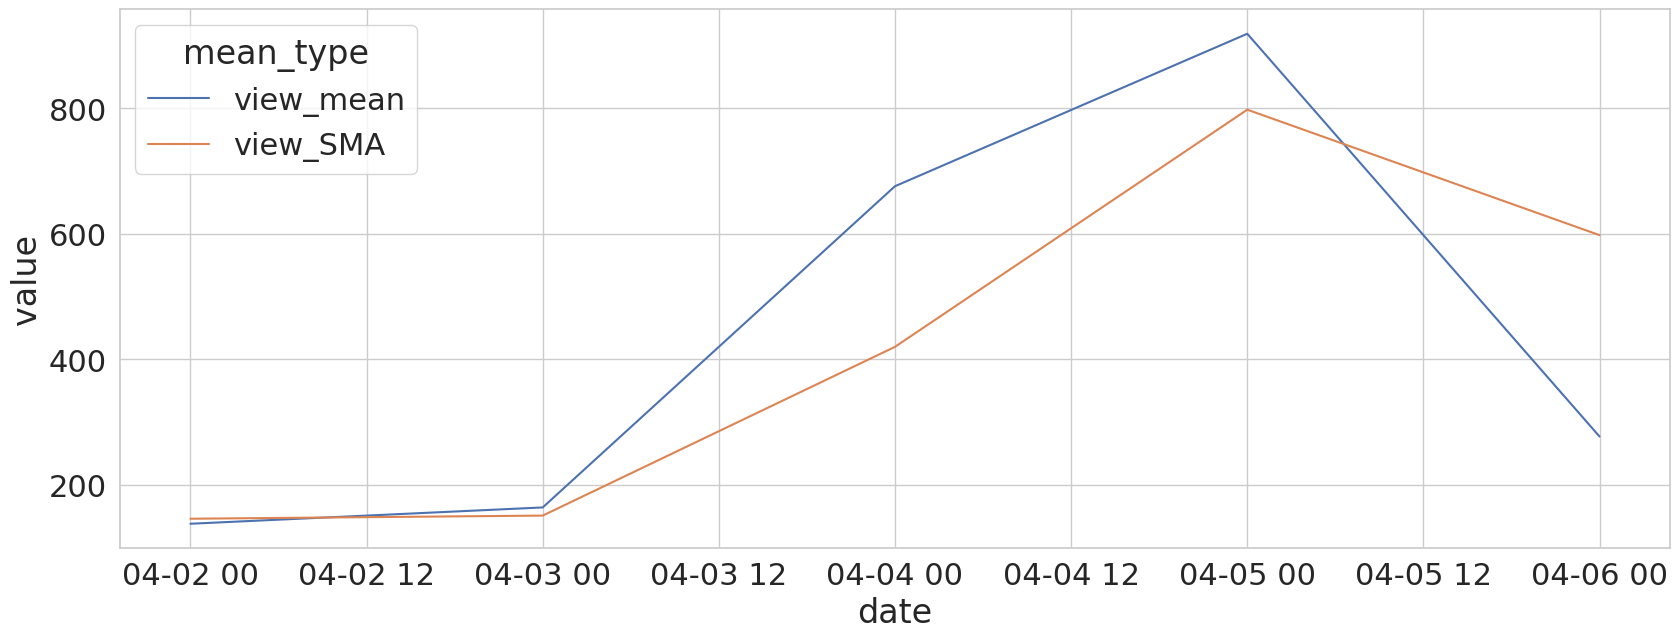

In [31]:
# создание и подсчет средних столбцов
avg_vs_SMA = avg_view_per_day.groupby('date', as_index=False) \
    .agg({'time': 'mean'}).round(0) \
    .rename(columns=({'time': 'view_mean'}))

# создание и подсчет SMA
avg_vs_SMA['view_SMA'] =  avg_view_per_day.groupby('date', as_index=False) \
    .agg({'time': 'mean'}).time.rolling(2).mean().round(0)

# подсчет абсолютных значений разницы между простым скользящим средним и Средними значениями
avg_vs_SMA['mean_SMA_dif'] = abs(avg_vs_SMA.view_mean - avg_vs_SMA.view_SMA)

# удаление значений NaN для построения графика
avg_vs_SMA_no_na = avg_vs_SMA.dropna()

# набор данных должен иметь длинный формат для построения графика
avg_vs_SMA_no_na_melted = avg_vs_SMA_no_na.melt('date', var_name='mean_type', value_vars=['view_mean', 'view_SMA'], value_name='value')

# построение графика средних значений asd SMA
sns.lineplot(data=avg_vs_SMA_no_na_melted, x='date', y='value', hue='mean_type')

**Найдите день с наибольшей разницей между простым скользящим средним и Средними значениями.**

In [32]:
avg_vs_SMA.sort_values('mean_SMA_dif', ascending=False).head(1)

,date,view_mean,view_SMA,mean_SMA_dif
5,2019-04-06,277.0,598.0,321.0


In [33]:
avg_vs_SMA

,date,view_mean,view_SMA,mean_SMA_dif
0,2019-04-01,154.0,NaN,NaN
1,2019-04-02,138.0,146.0,8.0
2,2019-04-03,164.0,151.0,13.0
3,2019-04-04,676.0,420.0,256.0
4,2019-04-05,919.0,798.0,121.0
5,2019-04-06,277.0,598.0,321.0


**Найдите объявление (ad_id), которое является причиной аномалии, обнаруженной на предыдущем шаге.**

In [34]:
avg_view_per_day.query('date == "2019-04-06"') \
    .sort_values('time', ascending=False) \
    .head(1) \
    .ad_id

<ipython-input-34-bd8d19315ea4>:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  avg_view_per_day.query('date == "2019-04-06"') \


,ad_id
1902,112583


**Объедините ads_clients_data и ads_data, чтобы найти среднее количество дней, прошедших с даты регистрации клиентов (create_data) и даты создания первого объявления (date).**

In [36]:
# загрузка ads_clients_data
clients = pd.read_csv('ads_clients_data.csv', parse_dates=['date', 'create_date'])
clients

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [37]:
# объединение фреймов данных
merged_df = data.merge(clients.drop(columns=['date']), on='client_union_id')

merged_df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19


In [43]:
# определение среднего значения дней, прошедших с даты регистрации клиентов до первого показа
# создание рекламы
merged_df.groupby('client_union_id', as_index=False) \
    .apply(lambda x: (x.date - x.create_date).min()) \
    .mean()

<ipython-input-43-b33c76f230e8>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.date - x.create_date).min()) \


,0
client_union_id,47921.434368
None,124 days 09:04:43.532219570


**Рассчитать коэффициент конверсии от регистрации клиента до создания рекламы за последний календарный год (365 дней).**

In [44]:
# Фильтрация данных (за последние 365 дней)
threshold = pd.to_timedelta(365, unit='d')

creation_dif = merged_df.groupby('client_union_id') \
    .apply(lambda x: (x.date - x.create_date).min()) \

creation_dif.loc[creation_dif < threshold]

<ipython-input-44-996812b686bf>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.date - x.create_date).min()) \


,0
client_union_id,
1,98 days
9,114 days
13,66 days
16,105 days
20,32 days
...,...
122004,67 days
122013,151 days
122023,126 days


In [45]:
# расчет коэффициента конверсии (CR)
unique_users = clients.client_union_id.nunique()
users_created_ad = creation_dif.shape[0]

cr = round((users_created_ad / unique_users) * 100, 2)

cr

0.69

**Классифицируйте наших клиентов на основе дней, прошедших с даты регистрации клиентов до создания первого объявления**

In [46]:
# вычисление задержки
merged_df['delay'] = merged_df.date - merged_df.create_date

# разделение задержек по категориям
merged_df['delay_categorical'] = pd.cut(merged_df.delay, pd.to_timedelta([0, 30, 90, 180, 365], unit='d'), labels=['one_month', 'one_quoter', 'half_a_year', 'one_year'])

# разделение задержек по категориям
merged_df.groupby(['client_union_id', 'delay_categorical']) \
     .agg({'time': 'nunique'}) \
     .query('time > 0') \
    .reset_index() \
    .delay_categorical.value_counts()

<ipython-input-46-4ecd6aed5822>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(['client_union_id', 'delay_categorical']) \


,count
delay_categorical,
half_a_year,399
one_quoter,265
one_year,169
one_month,11


**Создайте интерактивную гистограмму с категоризированными данными, выполнив описанный выше шаг.**

In [47]:
import plotly.express as px

categorized = merged_df.groupby(['client_union_id', 'delay_categorical']) \
     .agg({'time': 'nunique'}) \
     .query('time > 0') \
     .reset_index() \
     .groupby('delay_categorical', as_index=False) \
     .agg({'client_union_id': 'nunique'}) \
     .rename(columns={'client_union_id': 'number_of_clients'})


categorized

<ipython-input-47-fcfdc55d02b5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorized = merged_df.groupby(['client_union_id', 'delay_categorical']) \
<ipython-input-47-fcfdc55d02b5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorized = merged_df.groupby(['client_union_id', 'delay_categorical']) \


,delay_categorical,number_of_clients
0,one_month,11
1,one_quoter,265
2,half_a_year,399
3,one_year,169


In [48]:
fig = px.bar(categorized, x="delay_categorical", y="number_of_clients", title="Counting Number of Clients in Each Category")
fig.show()

<img src='plotly_result.png'>